<a href="https://colab.research.google.com/github/rupeshnerkar11/Machine-Learning-Projects/blob/main/M3_BoardGame_review_pridction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Board Game review Prediction

## Importing Data set from Git Repository`

In [ ]:
# Clone the entire repo.
!git clone -l -s git://github.com/ThaWeatherman/scrapers
%cd cloned-repo
!ls

Cloning into 'scrapers'...
remote: Enumerating objects: 133, done.
remote: Total 133 (delta 0), reused 0 (delta 0), pack-reused 133
Receiving objects: 100% (133/133), 2.74 MiB | 18.96 MiB/s, done.
Resolving deltas: 100% (47/47), done.
[Errno 2] No such file or directory: 'cloned-repo'
/content
sample_data  scrapers


In [ ]:
# Fetch a single <1MB file using the raw GitHub URL.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/ThaWeatherman/scrapers/master/boardgamegeek/games.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6837k  100 6837k    0     0  34.9M      0 --:--:-- --:--:-- --:--:-- 34.9M


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
%matplotlib inline
import sys
import seaborn as sns
from sklearn.model_selection import train_test_split

## Loadind Data and EDA

In [ ]:
game = pd.read_csv('/content/games.csv')

In [ ]:
print(game.columns)
print(game.shape)
# we are concern of  'average_rating'

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


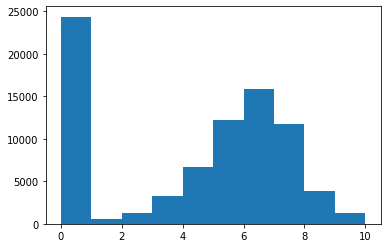

In [ ]:
plt.hist(game["average_rating"])
plt.show()

In [ ]:
# print the frist row of all the games with zero scores

print(game[game['average_rating'] == 0].iloc[0])

# print the frist row of all the games with greater than zero scores

print(game[game['average_rating'] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

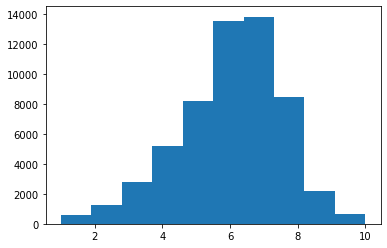

In [ ]:
# To remove rows without user rartings
game = game[game['average_rating'] > 0]

# to remove rows with missing values
game = game.dropna(axis=0)

plt.hist(game["average_rating"])
plt.show()

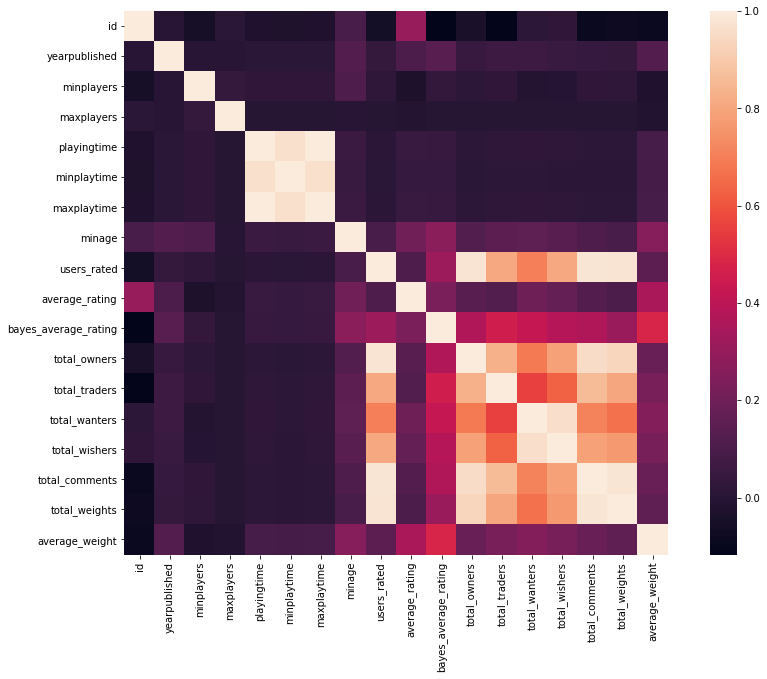

In [ ]:
# correlation matrix
corr= game.corr()
fig = plt.figure(figsize=(15,10))

sns.heatmap(corr, vmax= 1, square= True)
plt.show()

In [ ]:
# Data preprocesing getting all column data from the DAta frame
columns = game.columns.tolist()

# filtering tyhe column to remove the data

columns= [c for c in columns if c not in ['id', 'type', 'name','average_rating', 'bayes_average_rating']]

# vriable that will be predicted is stored here
target = "average_rating"



In [ ]:
# genetaring testing and training data set

from sklearn.model_selection import train_test_split

train = game.sample(frac= 0.8, random_state= 1)

test = game.loc[~game.index.isin(train.index)]


print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


# Logistic Regression

In [ ]:
# Using Models

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LRmodel = LinearRegression()

LRmodel.fit(train[columns], train[target])



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Generation of prediction
prediction = LRmodel.predict(test[columns])

# computing the erroe between training and testing
mean_squared_error(prediction, test[target])

2.078819032629323

In [ ]:
# Not too good not too bad

# this is not a linear data so this is not a perfect fit model



# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

RFRmodel = RandomForestRegressor(n_estimators= 100,min_samples_leaf=10,random_state=1)


RFRmodel.fit(train[columns], train[target])


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [ ]:
# Prdictions

prediction = RFRmodel.predict(test[columns])


#error computing

mean_squared_error(prediction, test[target])

1.4458560046071653

In [ ]:
rating_LR = LRmodel.predict(test[columns].iloc[0].values.reshape(1,-1))

rating_RFR = RFRmodel.predict(test[columns].iloc[0].values.reshape(1,-1))

In [ ]:
print(rating_LR)

print(rating_RFR)

[8.12061283]
[7.91373581]


In [ ]:
test[target].iloc[0]

8.07933

In [ ]:
# Hence we are able to predict the ratings and prediction through Random Froest Regresssion 
# nearly close to the actual value